# COGS 108 - Data Checkpoint

# Names

- Alec Panattoni
- Tyler Tran
- Sophia Lui
- Rodolfo Cardenas

<a id='research_question'></a>
# Research Question

*Is there a relationship between the adoption outcomes for shelter animals in California and the onset
(and continuation) of COVID-19 related lockdowns beginning in March 2020 and onwards?*

# Dataset(s)

- Dataset Name: "Animal Shelter Intake and Outcome"
- Link to the dataset: https://data.sonomacounty.ca.gov/Government/Animal-Shelter-Intake-and-Outcome/924a-vesw
- Number of observations: 20,176

The provided link contains over 20,000 accounts of animals taken in by shelters specifically in Sonoma County. The data includes necessary information required to answer our research question, such as Intake Date, Outcome Date, and Outcome Type (How the animal left the shelter). There are also other useful columns that could be useful for potential research-based analysis relevant to our question, such as Type (specifying Cat/Dog/Other), Sex, Intake Type (Method of arrival), and Outcome/Intake Condition. Furthermore, the data has columns: Name, Color, Size, DOB, Impound Number, Kennel Number, Animal ID, Days in Shelter, Intake SUbtype, Outcome Subtype, Intake Jurisdiction, Outcome Jurisdiction, Outcome Zip Code, and Location (Coordinates of outcome location). It is worth noting that this dataset is constantly updated with new cases of animal intake/outcomes. In order to keep our analysis consistent, we will only be using the dataset as updated on 10/21/2021.

# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import os

In [2]:
shelter_data = pd.read_csv("sonoma_county_shelter_data.csv")
shelter_data = shelter_data[shelter_data["Type"].isin(["CAT", "DOG"])]
shelter_data


,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Impound Number,Kennel Number,Animal ID,...,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count
0,REMY,DOG,BEAGLE,BLACK/WHITE,Female,MED,4/11/2014,K21-039564,DS69,A406645,...,PHONE,RETURN TO OWNER,OVER THE COUNTER_WEB,UNKNOWN,PENDING,SANTA ROSA,SANTA ROSA,95407.0,"95407(38.403734, -122.736775)",1
1,*RONDE,DOG,CHIHUAHUA SH,TAN,Neutered,SMALL,7/24/2020,K21-039133,DA30,A406003,...,FIELD,ADOPTION,SCAS WEB,HEALTHY,HEALTHY,SANTA ROSA,*PETALUMA,94954.0,"94954(38.245316, -122.59871)",1
2,*SNOOP,CAT,DOMESTIC SH,GRAY,Neutered,SMALL,8/4/2019,K21-039232,CA02,A406151,...,FIELD,ADOPTION,SCAS WEB,HEALTHY,HEALTHY,SANTA ROSA,SANTA ROSA,95405.0,"95405(38.439152, -122.672541)",1
3,FIFI,CAT,SIAMESE,SEAL PT,Spayed,KITTN,10/27/2020,K21-037796,CA03,A402286,...,OVER THE COUNTER,ADOPTION,SCAS WEB,UNKNOWN,PENDING,SANTA ROSA,SANTA ROSA,95407.0,"95407(38.403734, -122.736775)",1
4,*MERLIN,CAT,DOMESTIC SH,BRN TABBY,Neutered,SMALL,1/16/2018,K21-037709,CS05,A402139,...,PHONE,ADOPTION,SCAS WEB,UNKNOWN,PENDING,SANTA ROSA,COUNTY,94952.0,"94952(38.236012, -122.730241)",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21942,NaN,CAT,DOMESTIC SH,GRAY/WHITE,Female,SMALL,NaN,K19-031738,SMM,A385051,...,OVER THE COUNTER,EUTHANIZE,ILL SEVERE,UNKNOWN,UNTREATABLE,SANTA ROSA,NaN,NaN,NaN,1
21943,NaN,CAT,DOMESTIC SH,GRAY,Unknown,KITTN,NaN,K18-027667,RECEIVING,A370465,...,COMM CAT,TRANSFER,FORGOTTEN,UNKNOWN,HEALTHY,COUNTY,SANTA ROSA,95403.0,"95403(38.486997, -122.749134)",1
21944,NaN,DOG,CHIHUAHUA LH/MIX,BLACK/WHITE,Male,TOY,2/3/2017,K18-027158,DA16,A367906,...,OVER THE COUNTER,TRANSFER,RP SHELTER,HEALTHY,HEALTHY,COUNTY,*ROHNERT PARK,94928.0,"94928(38.346718, -122.695947)",1
21945,ANDY,DOG,CHIHUAHUA LH/MIX,BROWN/WHITE,Neutered,TOY,4/24/2015,K17-022896,LOBBY,A349854,...,OVER THE COUNTER,ADOPTION,INTERNET,TREATABLE/REHAB,TREATABLE/REHAB,SANTA ROSA,OUT OF COUNTY,94109.0,"94109(37.792737, -122.420971)",1


# Data Cleaning

Describe your data cleaning steps here.

In [3]:
shelter_data.describe()

,Days in Shelter,Outcome Zip Code,Count
count,20176.000000,17488.000000,20176.000000
mean,17.083515,94994.169145,0.997869
std,34.162210,3965.974323,0.046117
min,0.000000,1922.000000,0.000000
25%,1.000000,95401.000000,1.000000
50%,8.000000,95405.000000,1.000000
75%,21.000000,95436.000000,1.000000
max,1239.000000,99701.000000,1.000000


In [4]:
shelter_data.isna().sum()

Name                    4452
Type                       0
Breed                      0
Color                      0
Sex                        0
Size                      33
Date Of Birth           4155
Impound Number             0
Kennel Number             15
Animal ID                  0
Intake Date                0
Outcome Date             139
Days in Shelter            0
Intake Type                0
Intake Subtype             0
Outcome Type             140
Outcome Subtype          337
Intake Condition           0
Outcome Condition        360
Intake Jurisdiction        0
Outcome Jurisdiction    2632
Outcome Zip Code        2688
Location                2688
Count                      0
dtype: int64

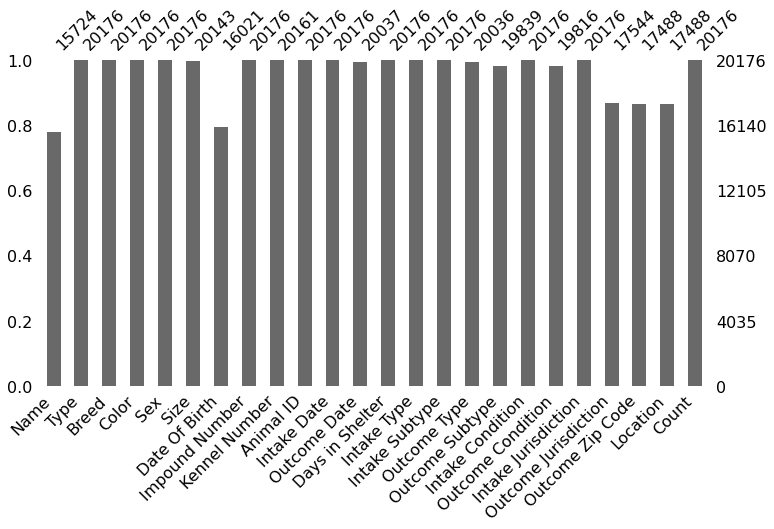

In [5]:
msno.bar(shelter_data, figsize=(12, 6))

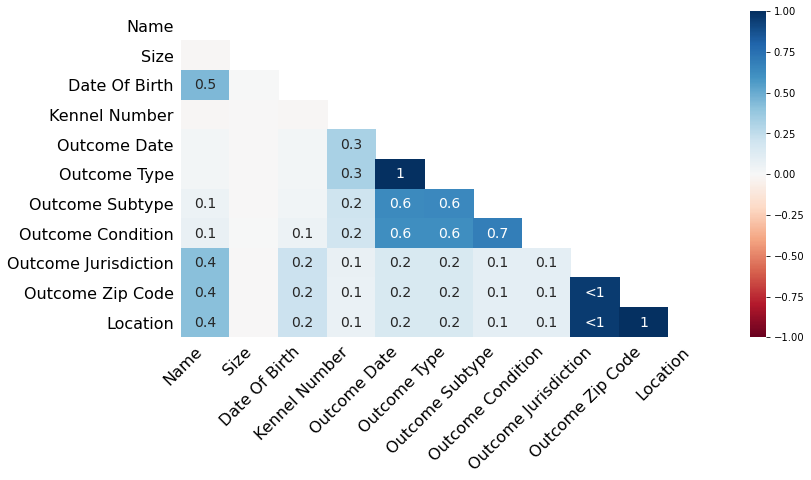

In [6]:
msno.heatmap(shelter_data, figsize=(12, 6))

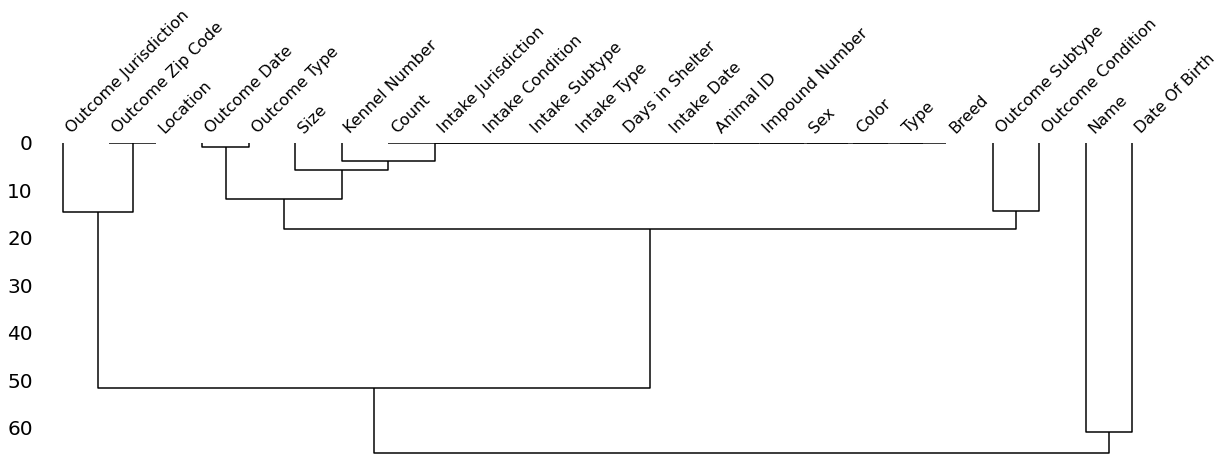

In [7]:
msno.dendrogram(shelter_data, figsize=(20, 6))

In [8]:
cats = shelter_data[shelter_data["Type"] == "CAT"]
dogs = shelter_data[shelter_data["Type"] == "DOG"]

In [9]:
cats.isna().sum()

Name                    3250
Type                       0
Breed                      0
Color                      0
Sex                        0
Size                       2
Date Of Birth           2094
Impound Number             0
Kennel Number              7
Animal ID                  0
Intake Date                0
Outcome Date              47
Days in Shelter            0
Intake Type                0
Intake Subtype             0
Outcome Type              48
Outcome Subtype          138
Intake Condition           0
Outcome Condition        167
Intake Jurisdiction        0
Outcome Jurisdiction    1459
Outcome Zip Code        1460
Location                1460
Count                      0
dtype: int64

In [10]:
dogs.isna().sum()

Name                    1202
Type                       0
Breed                      0
Color                      0
Sex                        0
Size                      31
Date Of Birth           2061
Impound Number             0
Kennel Number              8
Animal ID                  0
Intake Date                0
Outcome Date              92
Days in Shelter            0
Intake Type                0
Intake Subtype             0
Outcome Type              92
Outcome Subtype          199
Intake Condition           0
Outcome Condition        193
Intake Jurisdiction        0
Outcome Jurisdiction    1173
Outcome Zip Code        1228
Location                1228
Count                      0
dtype: int64

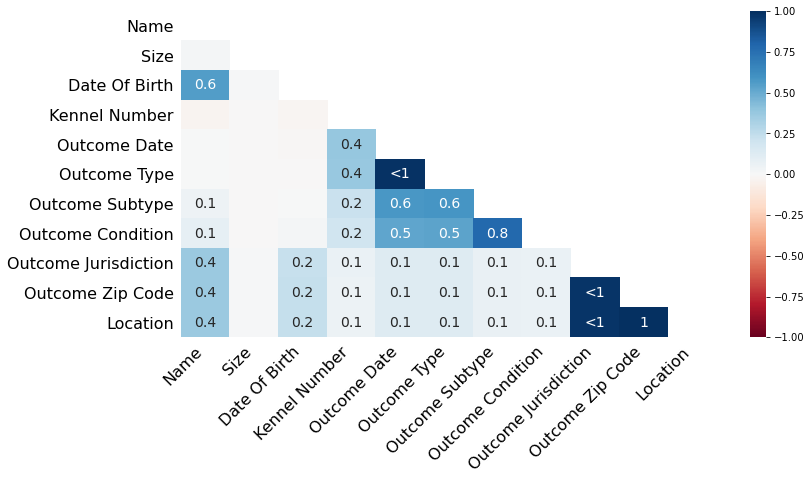

In [11]:
msno.heatmap(cats, figsize=(12, 6))

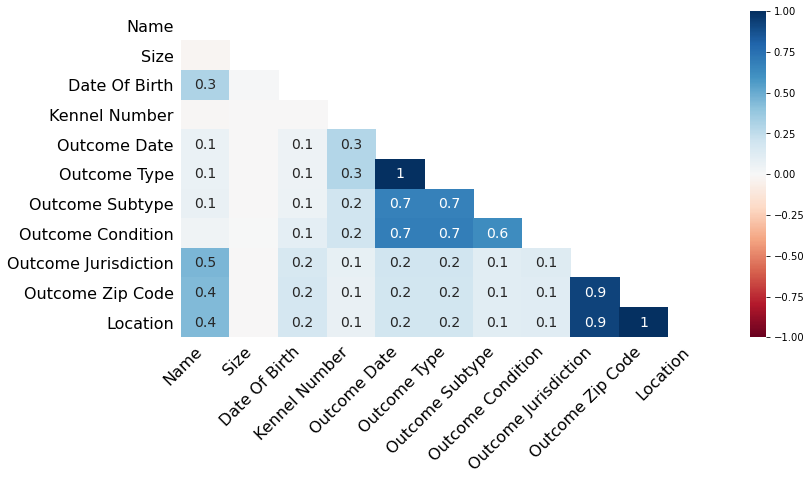

In [12]:
msno.heatmap(dogs, figsize=(12, 6))

In [13]:
# Adding a "Protected" column, which tells whether the animal is Neutered/Spayed, since the Sex column labels some
# animals as Neutered/Spayed. 
sex = shelter_data["Sex"]
protected = (sex.mask(sex.isin(["Neutered", "Spayed"]), True)).where(sex.isin(["Neutered", "Spayed"]), False)
shelter_data.insert(5, "Protected", protected)

In [14]:
cats["Sex"].value_counts()

Neutered    2749
Spayed      2490
Unknown     1209
Female       783
Male         598
Name: Sex, dtype: int64

In [15]:
# Number of animals that have been Neutered/Spayed
shelter_data["Protected"].value_counts()

True     13328
False     6848
Name: Protected, dtype: int64

In [16]:
# Proportional Intake type based on missingness of Names colummn
shelter_data[shelter_data["Name"].isnull()]["Intake Type"].value_counts(normalize = True)

STRAY              0.908805
OWNER SURRENDER    0.030323
CONFISCATE         0.025382
QUARANTINE         0.015049
TRANSFER           0.014151
OS APPT            0.006289
Name: Intake Type, dtype: float64

In [17]:
# Convert Neutered/Spayed observations in sex column to Male/Female
shelter_data["Sex"] = sex.mask(sex.isin(["Neutered"]), "Male").mask(sex.isin(["Spayed"]), "Female")
# This leaves only Male, Female, and Unknown in Sex column
shelter_data[["Sex", "Protected"]]

,Sex,Protected
0,Female,False
1,Male,True
2,Male,True
3,Female,True
4,Male,True
...,...,...
21942,Female,False
21943,Unknown,False
21944,Male,False
21945,Male,True


In [18]:
# Convert Date columns to datetime types
shelter_data["Date Of Birth"] = pd.to_datetime(shelter_data["Date Of Birth"])
shelter_data["Intake Date"] = pd.to_datetime(shelter_data["Intake Date"])
shelter_data["Outcome Date"] = pd.to_datetime(shelter_data["Outcome Date"])
shelter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20176 entries, 0 to 21946
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Name                  15724 non-null  object        
 1   Type                  20176 non-null  object        
 2   Breed                 20176 non-null  object        
 3   Color                 20176 non-null  object        
 4   Sex                   20176 non-null  object        
 5   Protected             20176 non-null  object        
 6   Size                  20143 non-null  object        
 7   Date Of Birth         16021 non-null  datetime64[ns]
 8   Impound Number        20176 non-null  object        
 9   Kennel Number         20161 non-null  object        
 10  Animal ID             20176 non-null  object        
 11  Intake Date           20176 non-null  datetime64[ns]
 12  Outcome Date          20037 non-null  datetime64[ns]
 13  Days in Shelter 

In [19]:
# since we are considering data over the COVID timeline, we would like to see what percent of our data is before the 
# onset of COVID (March 2020).
print(shelter_data["Intake Date"].quantile(.8778))
1 - .8778
# It seems that approximately 12% of our data occurs during lockdown (which, in California, started
# on the 4th of March 2020, when the governor of California declared a state of emergency) due to COVID

2020-03-04 00:00:00


0.12219999999999998

In [20]:
# Since asterisks included in Name designates an animal as being named by the shelter, we create a column
# "Named by Shelter" (boolean type) to tidy the data. Next, we remove the asterisks from names.
shelter_data.insert(1, 'Named by Shelter', shelter_data['Name'].astype(str).str.contains("\*"))
shelter_data["Name"] = shelter_data["Name"].str.replace("*", "", regex = True)
shelter_data

,Name,Named by Shelter,Type,Breed,Color,Sex,Protected,Size,Date Of Birth,Impound Number,...,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count
0,REMY,False,DOG,BEAGLE,BLACK/WHITE,Female,False,MED,2014-04-11,K21-039564,...,PHONE,RETURN TO OWNER,OVER THE COUNTER_WEB,UNKNOWN,PENDING,SANTA ROSA,SANTA ROSA,95407.0,"95407(38.403734, -122.736775)",1
1,RONDE,True,DOG,CHIHUAHUA SH,TAN,Male,True,SMALL,2020-07-24,K21-039133,...,FIELD,ADOPTION,SCAS WEB,HEALTHY,HEALTHY,SANTA ROSA,*PETALUMA,94954.0,"94954(38.245316, -122.59871)",1
2,SNOOP,True,CAT,DOMESTIC SH,GRAY,Male,True,SMALL,2019-08-04,K21-039232,...,FIELD,ADOPTION,SCAS WEB,HEALTHY,HEALTHY,SANTA ROSA,SANTA ROSA,95405.0,"95405(38.439152, -122.672541)",1
3,FIFI,False,CAT,SIAMESE,SEAL PT,Female,True,KITTN,2020-10-27,K21-037796,...,OVER THE COUNTER,ADOPTION,SCAS WEB,UNKNOWN,PENDING,SANTA ROSA,SANTA ROSA,95407.0,"95407(38.403734, -122.736775)",1
4,MERLIN,True,CAT,DOMESTIC SH,BRN TABBY,Male,True,SMALL,2018-01-16,K21-037709,...,PHONE,ADOPTION,SCAS WEB,UNKNOWN,PENDING,SANTA ROSA,COUNTY,94952.0,"94952(38.236012, -122.730241)",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21942,NaN,False,CAT,DOMESTIC SH,GRAY/WHITE,Female,False,SMALL,NaT,K19-031738,...,OVER THE COUNTER,EUTHANIZE,ILL SEVERE,UNKNOWN,UNTREATABLE,SANTA ROSA,NaN,NaN,NaN,1
21943,NaN,False,CAT,DOMESTIC SH,GRAY,Unknown,False,KITTN,NaT,K18-027667,...,COMM CAT,TRANSFER,FORGOTTEN,UNKNOWN,HEALTHY,COUNTY,SANTA ROSA,95403.0,"95403(38.486997, -122.749134)",1
21944,NaN,False,DOG,CHIHUAHUA LH/MIX,BLACK/WHITE,Male,False,TOY,2017-02-03,K18-027158,...,OVER THE COUNTER,TRANSFER,RP SHELTER,HEALTHY,HEALTHY,COUNTY,*ROHNERT PARK,94928.0,"94928(38.346718, -122.695947)",1
21945,ANDY,False,DOG,CHIHUAHUA LH/MIX,BROWN/WHITE,Male,True,TOY,2015-04-24,K17-022896,...,OVER THE COUNTER,ADOPTION,INTERNET,TREATABLE/REHAB,TREATABLE/REHAB,SANTA ROSA,OUT OF COUNTY,94109.0,"94109(37.792737, -122.420971)",1


As part of EDA, we will be assessing the type of missingness and conducting data imputation as appropriate. 


